Generate random Dataset for features and labels

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

num_observations = 5000

x1 = np.random.multivariate_normal([0,0], [[1,.75],[.75,1]],num_observations)
x2 = np.random.multivariate_normal([1,4], [[1,.75],[.75,1]],num_observations)

features = np.vstack((x1,x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations,-1),np.ones(num_observations)))

visualize the dataset against label dataset using scatter plot

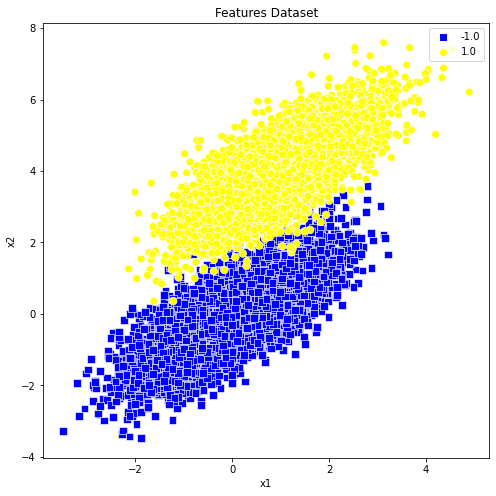

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
plt.title("Features Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plot = sns.scatterplot(x= features[:,0],y= features[:,1],hue=labels, s= 60, style = labels, palette = ['blue','yellow'],markers =["s","o"])
plt.legend(loc='upper right')

Split the initial dataset to training and test for featues and labels datasets in 80:20 ratio

---



In [3]:
from sklearn.model_selection import train_test_split

#split the dataset in to training and testing dataset for features and labels in 80:20 ratio
training_data, testing_data, training_labels, testing_labels = train_test_split(features, labels, test_size=0.2)

Implementation of Calc_gradient method to calculate and return the gradient value

In [4]:
import math

def calc_gradient(features,label,weights):
  #calculate numerator of gradient expression which is product of label and feature dataset
  yx_product = label*features.T
  #Find the exponential denominator value to find gradient
  exponential_denominator = (1+ np.exp(label*np.dot(features,np.transpose(weights))))
  gradient = -(yx_product/exponential_denominator).T
  return gradient

Implementation of cost_function method to calculate and return cost

In [5]:
def cost_function(features,label,weights):
  #calculate the exponential expression of the cost function
  exponential_expression = (1.0/(1+np.exp(-label*(np.dot(features,weights)))))
  log_of_exponential = np.log(exponential_expression)
  cost = (np.sum(log_of_exponential)/len(label))
  return cost

Implementation of logistic_regression_PB method to calculate and return weights

In [6]:
import math

def logistic_regression_PB(features,label,num_steps,learning_rate):
  weights = np.zeros(features.shape[1])
  total_gradient = 0
  cost_old,cost_new = 0,0
  for step in range(num_steps):
    gradient = calc_gradient(features,label,weights)
    avg_gradient = np.mean(gradient,axis = 0)
    weights -= learning_rate * avg_gradient

    #compare current cost value with previous cost value
    cost_new = round(cost_function(features,label,weights),12)
    #stop iterating if the cost value is not decreasing any further
    if(abs(cost_old) - abs(cost_new) == 0):
      return weights
    else:
      cost_old = cost_new

    #print cost value and weights at each 1000th step
    if step % 1000 == 0:
      print(cost_function(features,label,weights),weights)

  return weights

Calculate predicted weights by executing logistic regression method with out bias

In [7]:
# run with out bias 

## Execute model with logistic regression to get weights  with learning rate as 0.01
weights_predict = logistic_regression_PB(training_data,training_labels,25000, 0.01)

-0.6826034665054402 [0.00252166 0.01001959]
-0.4003115532572575 [-0.21093967  0.83245751]
-0.39549091316391677 [-0.40509823  0.92425318]
-0.3943490483038135 [-0.49863244  0.9715396 ]
-0.3940570287963235 [-0.54556424  0.99633087]
-0.39397923298527426 [-0.56968849  1.00935492]
-0.39395805915330817 [-0.58224714  1.01621046]
-0.39395223114798766 [-0.58882848  1.01982372]
-0.3939506175147421 [-0.59228946  1.02172955]
-0.39395016934715255 [-0.59411285  1.02273521]
-0.3939500446696066 [-0.59507443  1.02326598]
-0.39395000995503804 [-0.59558178  1.02354615]
-0.3939500002848797 [-0.59584954  1.02369405]
-0.39394999759049226 [-0.59599088  1.02377213]


Implementation of sigmoid method

In [8]:
#sigmoid function is calculate by testing feature data and predicted weights 
def sigmoid(fx):
  return 1 / (1 + np.exp(-fx))

Implementation of predict_values method to calculate the predicted values array

In [9]:
def predict_values(testing_data, weights):
  #calculate the dot product of testing feature data and predicted weights dataset and pass it to sigmoid method
  fx = np.dot(testing_data, weights)
  return sigmoid(fx)

Execute logistic_regression_PB with bais value

In [10]:
## Execute model with bias value
## Adding bias values for both training and test features dataset by adding a column at the end.
training_data_with_bias = np.hstack((training_data,np.ones([len(training_data),1])))
testing_data_with_bias = np.hstack((testing_data,np.ones([len(testing_data),1])))

## Execute model with logistic regression to get weights and bias
weights_predict_with_bias = logistic_regression_PB(training_data_with_bias,training_labels,15000, 0.01)


-0.6826035096207901 [2.52165984e-03 1.00195883e-02 1.00000000e-05]
-0.20144138844487677 [-0.21221411  1.09415201 -1.2609312 ]
-0.1346747025648994 [-0.46319477  1.42730078 -1.95440898]
-0.10492632932737407 [-0.63957082  1.66169915 -2.41145333]
-0.0880024484600847 [-0.77504613  1.84260681 -2.75403759]
-0.07699958604407613 [-0.88519594  1.99034535 -3.02926051]
-0.06922493816998082 [-0.97820366  2.11556008 -3.2600496 ]
-0.0634109470387455 [-1.05885184  2.22447726 -3.45927381]
-0.05888128593119608 [-1.13016519  2.32104367 -3.6348805 ]
-0.05524126832643256 [-1.19417452  2.40791677 -3.79212548]
-0.052244540399722254 [-1.25230821  2.48697129 -3.9346682 ]
-0.049729066772503945 [-1.30560893  2.55957962 -4.06516088]
-0.047583707109652366 [-1.3548611   2.62677707 -4.18558853]
-0.04572956726614079 [-1.40066987  2.68936429 -4.29747637]
-0.04410901691576592 [-1.44351204  2.74797356 -4.40202238]


Calculate predicted values using test data without bias by calling predict method

In [11]:
# calculate predicted values using test data
predicted_values = predict_values(testing_data,weights_predict)

#creating a dummy array with zeroes to store predicted values
predicted_value_array= np.zeros(predicted_values.shape)

for i in range(0,len(predicted_values)):
  if predicted_values[i] >= 0.5:
    predicted_value_array[i] = 1
  else:
    predicted_value_array[i] = -1

Calculate predicted values using test data with bias by calling predict method

In [12]:
# calculate predicted values using test data with bias
predicted_values_with_bias = predict_values(testing_data_with_bias,weights_predict_with_bias)

#creating a dummy array with zeroes to store predicted values
predicted_value_array_with_bias= np.zeros(predicted_values.shape)

for i in range(0,len(predicted_values_with_bias)):
  if predicted_values_with_bias[i] >= 0.5:
    predicted_value_array_with_bias[i] = 1
  else:
    predicted_value_array_with_bias[i] = -1

Calculate and print the accuracy score with out using bias value

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

c_matrix = confusion_matrix(testing_labels, predicted_value_array)
print("Confusion Matrix: \n")
print(c_matrix)
Accuracy_score = accuracy_score(testing_labels, predicted_value_array)
print(f'\n Accuracy score of the model with out using bias value is:  {Accuracy_score}')

Confusion Matrix: 

[[491 517]
 [  0 992]]

 Accuracy score of the model with out using bias value is:  0.7415


Calculate and print the accuracy score with bias value

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

c_matrix = confusion_matrix(testing_labels, predicted_value_array_with_bias)
print("Confusion Matrix: \n")
print(c_matrix)
Accuracy_score = accuracy_score(testing_labels, predicted_value_array_with_bias)
print(f'\n Accuracy score of the model with bias value is:  {Accuracy_score}')

Confusion Matrix: 

[[998  10]
 [  3 989]]

 Accuracy score of the model with bias value is:  0.9935


Calculate and print accuracy score of model with training and test dataset using sklearn logistic Regression module

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(training_data, training_labels)
Acuuracy_score_sklearn = model.score(testing_data, testing_labels)
print(f'\n Accuracy score with sklearn logistic regression is :  {Acuuracy_score_sklearn}')


 Accuracy score with sklearn logistic regression is :  0.9935
